In [1]:
import pandas as pd
from pandas_datareader import data
import matplotlib.pyplot as plt
import datetime
import load_data

'''
Generate stock prices for S&P500, each starting from 2000-01-01 up to today.
Data will be under data/sp500 directory
'''
#sp500 = get_SP500_stocks() #
#dump_tickers(sp500, base_dir="../data/temp") #"../data/sp500")
load_data.dump_tickers(['SPY','GOOG', 'IBM', 'GLD'], base_dir="../../data") #"../data/sp500")

last_date 2017-10-10
new_start_date: 2017-10-11
Got <class 'NameError'> . Retrying....
Got <class 'NameError'> . Retrying....
Got <class 'NameError'> . Retrying....
last_date 2017-10-10
new_start_date: 2017-10-11
Got <class 'NameError'> . Retrying....
Got <class 'NameError'> . Retrying....
Got <class 'NameError'> . Retrying....
last_date 2017-10-10
new_start_date: 2017-10-11
Got <class 'NameError'> . Retrying....
Got <class 'NameError'> . Retrying....
Got <class 'NameError'> . Retrying....
last_date 2017-10-10
new_start_date: 2017-10-11
Got <class 'NameError'> . Retrying....
Got <class 'NameError'> . Retrying....
Got <class 'NameError'> . Retrying....


                AAPL     AMD  CLDR  FB  NDAQ      NVDA
2000-01-03  3.596616  15.500   NaN NaN   NaN  3.619193
2000-01-04  3.293384  14.625   NaN NaN   NaN  3.522552
2000-01-05  3.341579  15.000   NaN NaN   NaN  3.406583
2000-01-06  3.052405  16.000   NaN NaN   NaN  3.184309
2000-01-07  3.196992  16.250   NaN NaN   NaN  3.237462


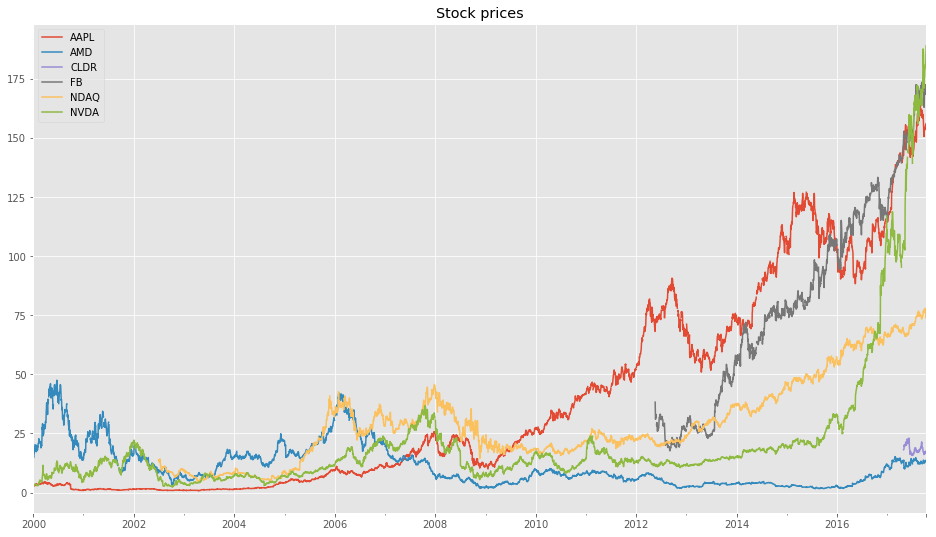

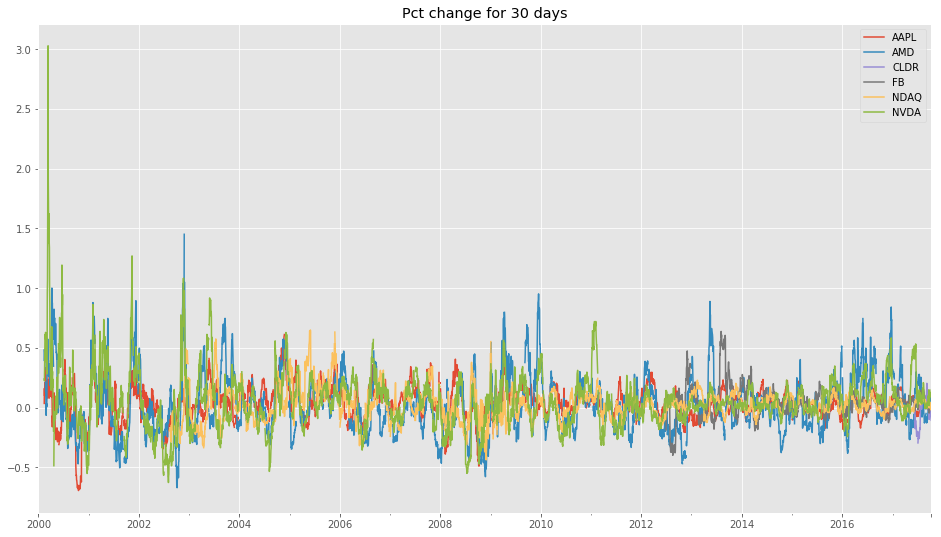

In [2]:
'''
Get price type for list of stocks
'''
def get_hist_price(tickers,
                colname='Adj Close',
                data_source='yahoo', 
                start_date= '2000-01-01', 
                end_date=datetime.datetime.today().strftime('%Y-%m-%d')):

    # User pandas_reader.data.DataReader to load the desired data. As simple as that.
    panel_data = data.DataReader(tickers, data_source, start_date, end_date)
    #print(list(panel_data))
    #print(panel_data['Close'])


    # Getting just the adjusted closing prices. This will return a Pandas DataFrame
    # The index in this DataFrame is the major index of the panel_data.
    close = panel_data.ix[colname]

    # Getting all weekdays between 01/01/2000 and 12/31/2016
    all_weekdays = pd.date_range(start=start_date, end=end_date, freq='B')

    # How do we align the existing prices in adj_close with our new set of dates?
    # All we need to do is reindex close using all_weekdays as the new index
    close = close.reindex(all_weekdays)
    return close

def plot(data, title):
    plt.style.use('ggplot')
    plt.rcParams["figure.figsize"] = [16,9]

    plt.figure()  
    data.plot(title=title)
    plt.show()

    plt.figure()
    # Pct change for 30 days
    data.pct_change(30).plot(title='Pct change for 30 days')
    plt.show()
    


stocks=['AAPL', 'CLDR', 'FB', 'NVDA', 'AMD', 'NDAQ']
#dump_tickers(stocks)

data1 = get_hist_price(tickers=stocks) #, #'MSFT', 'FB',
'''
data2 = get_hist_price(tickers=['VTXVX', # Vanguard Target Retirement 2015 Inv
                            'VTWNX', # Vanguard Target Retirement 2020
                            'VTTVX', # "Vanguard Target Retirement 2025 Inv
                            'VTTHX', #Vanguard Target Retirement 2035 Inv ()
                            'VTPSX', #VANG TOT INTL STK IP 
                            'VEMPX', # Vanguard Extended Market Index Fund Institutional Plus Shares
                            'VBMPX', #Vanguard Total Bond Market Index Fund Institutional Plus Shares
                            'DODFX' #DODGE & COX INTL STK ()'
                           ])

'''
print(data1.head())
plot(data1, 'Stock prices')
pickle_file = 'stocks.pickle'
data1.to_pickle(pickle_file)

In [3]:
'''
Slicing by rows
'''
# Only want subset of rows
dates = pd.date_range('2008-01-02','2008-01-10')
print(dates[len(dates)-1])
print(data1[dates[0] :dates[len(dates)-1]])

# Same as
print(data1.ix['2008-01-02':'2008-01-10'])

'''
Slicing by columns
'''
print(data1[['AAPL', 'AMD']].head())

'''
Slicing by rows and columns
'''
print(data1.ix['2008-01-02':'2008-01-10',['AAPL', 'AMD']])



2008-01-10 00:00:00
                 AAPL   AMD  CLDR  FB       NDAQ       NVDA
2008-01-02  25.041281  7.14   NaN NaN  44.032314  30.625036
2008-01-03  25.052847  6.77   NaN NaN  43.210651  30.383825
2008-01-04  23.140436  6.25   NaN NaN  40.754761  27.832512
2008-01-07  22.830696  6.08   NaN NaN  41.603832  24.956482
2008-01-08  22.009445  6.00   NaN NaN  39.732258  25.485296
2008-01-09  23.056898  5.53   NaN NaN  40.882587  26.802704
2008-01-10  22.879536  5.96   NaN NaN  42.014656  26.246054
                 AAPL   AMD  CLDR  FB       NDAQ       NVDA
2008-01-02  25.041281  7.14   NaN NaN  44.032314  30.625036
2008-01-03  25.052847  6.77   NaN NaN  43.210651  30.383825
2008-01-04  23.140436  6.25   NaN NaN  40.754761  27.832512
2008-01-07  22.830696  6.08   NaN NaN  41.603832  24.956482
2008-01-08  22.009445  6.00   NaN NaN  39.732258  25.485296
2008-01-09  23.056898  5.53   NaN NaN  40.882587  26.802704
2008-01-10  22.879536  5.96   NaN NaN  42.014656  26.246054
                AAPL

                AAPL       AMD  CLDR        FB      NDAQ      NVDA
2013-01-02  1.000000  1.000000   NaN  1.000000  1.000000  1.000000
2013-01-03  0.987378  0.984190   NaN  0.991786  1.024068  1.000786
2013-01-04  0.959875  1.023715   NaN  1.027143  1.027950  1.033805
2013-01-07  0.954228  1.055336   NaN  1.050714  1.019798  1.003931
2013-01-08  0.956797  1.055336   NaN  1.037857  1.013199  0.981918


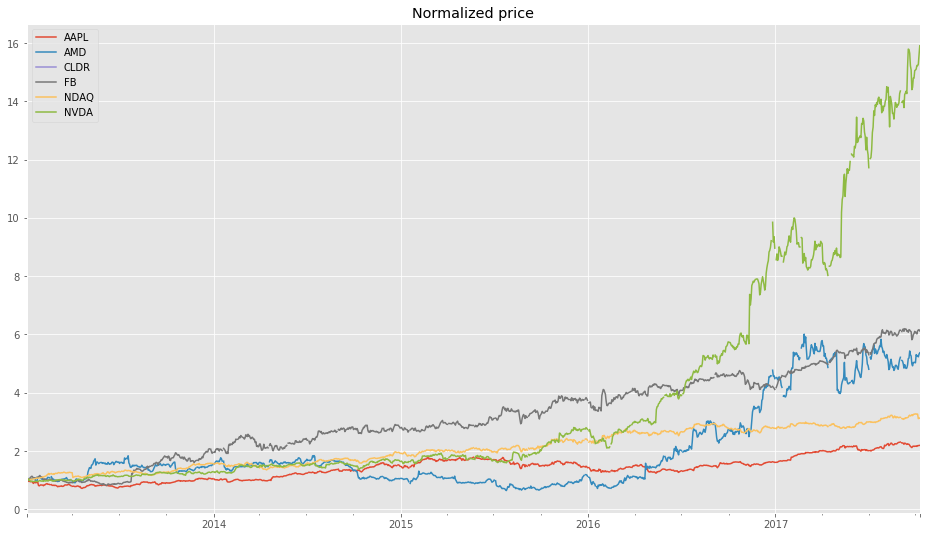

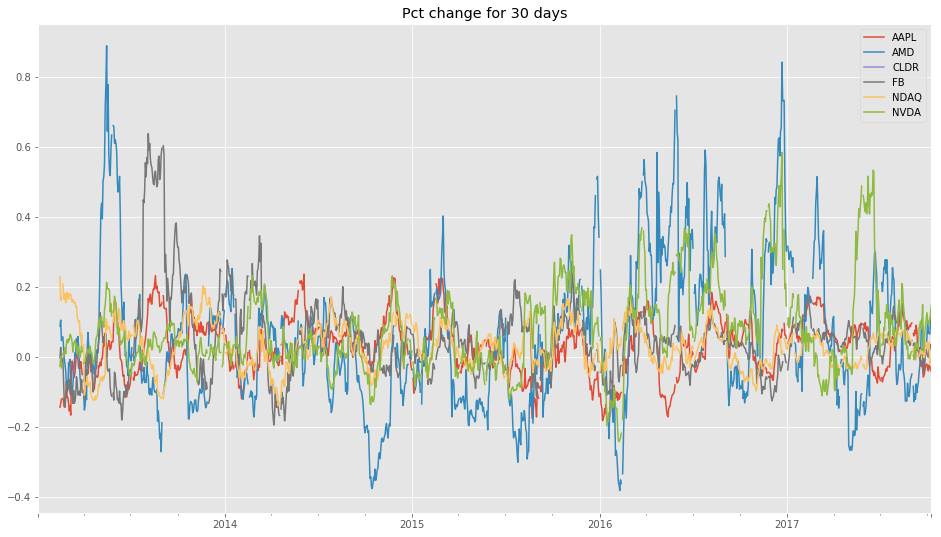

In [4]:
'''
Normalizing data: start all stocks at $1 by dividing the 1st stock values
'''
def normalize_data(df):
    return df/df.ix[0,:]

norm = normalize_data(pd.DataFrame(data1.ix['2013-01-02':'2018-01-01']))
print(norm.head())
plot(norm, 'Normalized price')

In [5]:
import os
import glob

base_dir="../data"
csv_files = os.path.join(base_dir, "*.csv")
result = glob.glob(csv_files)
print(len(result))

6


stocks.pickle


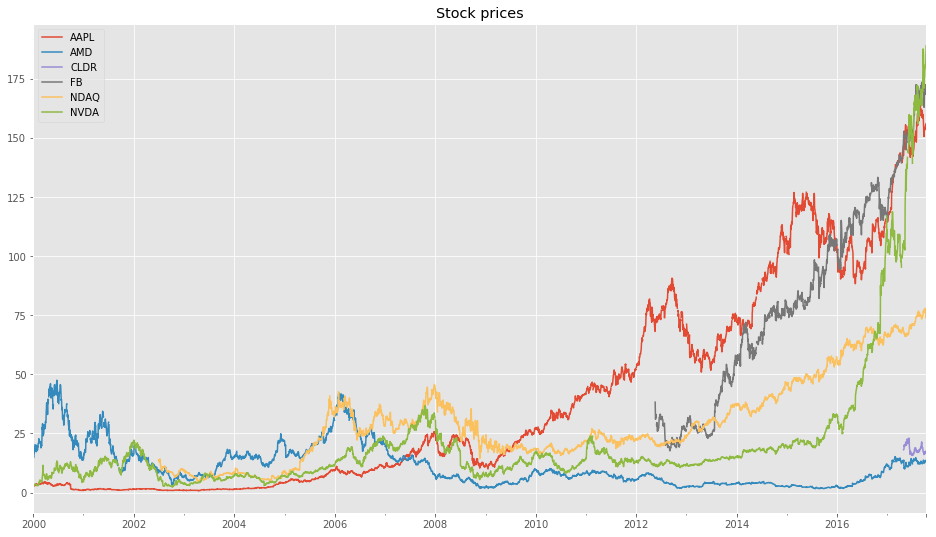

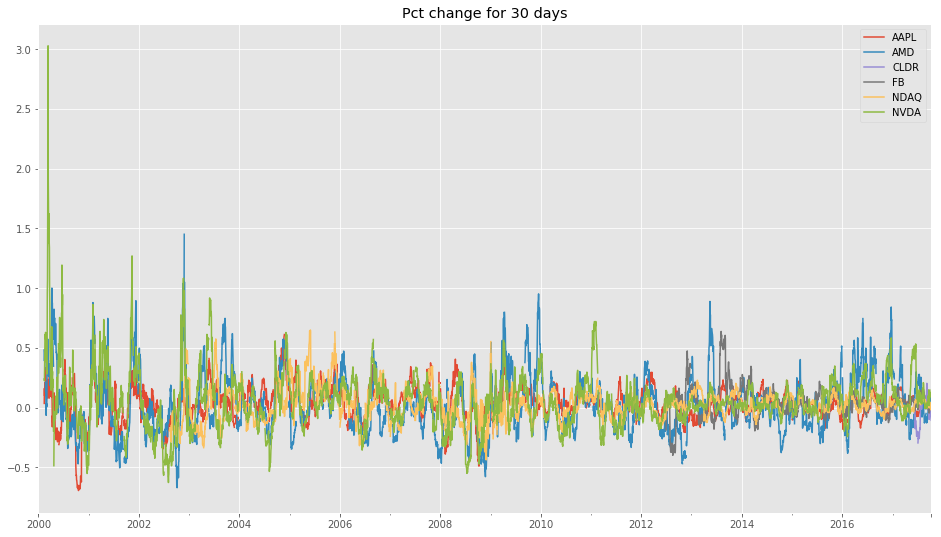

In [6]:
print(pickle_file)

data = pd.read_pickle(pickle_file)

#data.fillna(method='ffill', inplace='TRUE')
#data.fillna(method='bfill', inplace='TRUE')

plot(data, "Stock prices")

See http://www.learndatasci.com/python-finance-part-2-intro-quantitative-trading-strategies/

In [7]:
# Log returns - First the logarithm of the prices is taken and the the difference of consecutive (log) observations
import numpy as np

log_returns = np.log(data1).diff()
log_returns.head()

,AAPL,AMD,CLDR,FB,NDAQ,NVDA
2000-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-04,-0.088078,-0.058108,NaN,NaN,NaN,-0.027065
2000-01-05,0.014528,0.025318,NaN,NaN,NaN,-0.033476
2000-01-06,-0.090514,0.064539,NaN,NaN,NaN,-0.067474
2000-01-07,0.046281,0.015504,NaN,NaN,NaN,0.016554


In [8]:
data1.head()

,AAPL,AMD,CLDR,FB,NDAQ,NVDA
2000-01-03,3.596616,15.500,NaN,NaN,NaN,3.619193
2000-01-04,3.293384,14.625,NaN,NaN,NaN,3.522552
2000-01-05,3.341579,15.000,NaN,NaN,NaN,3.406583
2000-01-06,3.052405,16.000,NaN,NaN,NaN,3.184309
2000-01-07,3.196992,16.250,NaN,NaN,NaN,3.237462


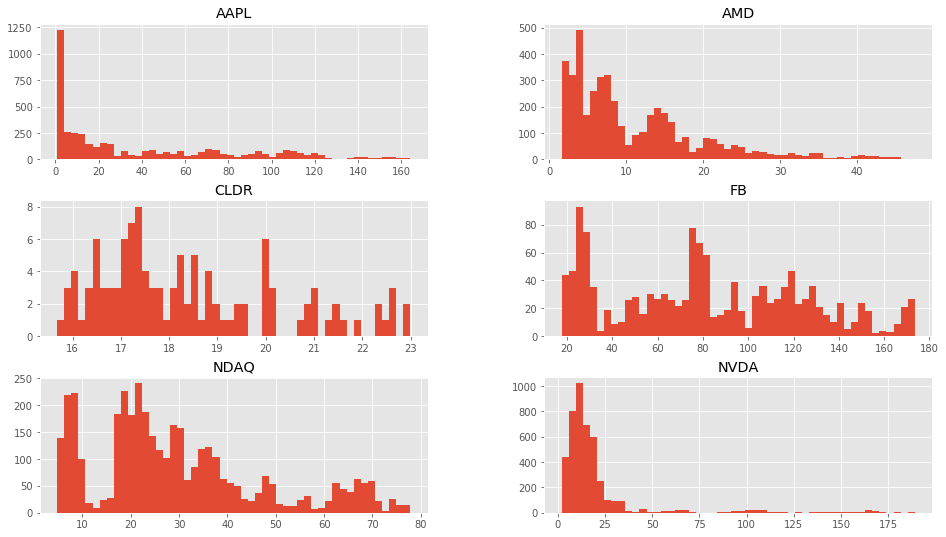

In [9]:
data.hist(bins=50)
plt.show()

In [10]:
# Scatter plots


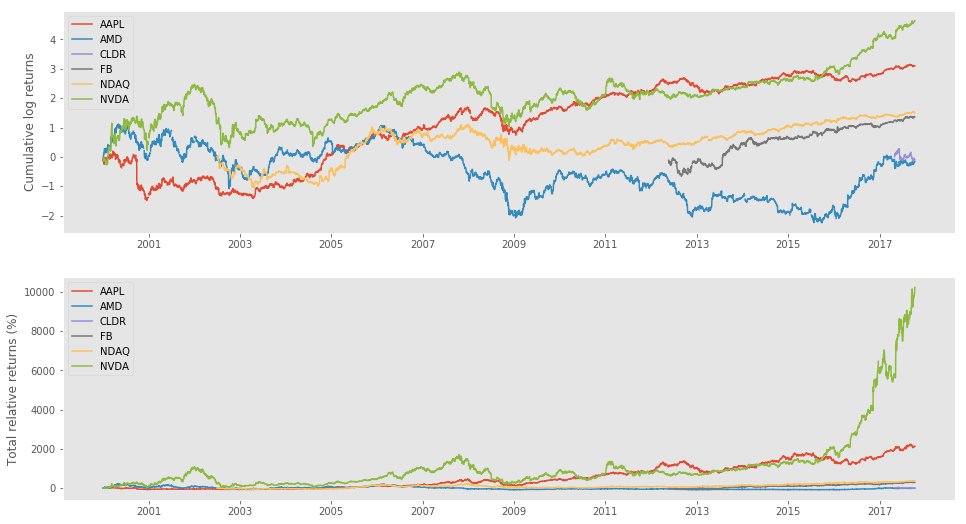

In [11]:
fig = plt.figure(figsize=[16,9])

ax = fig.add_subplot(2,1,1)

for c in log_returns:
    ax.plot(log_returns.index, log_returns[c].cumsum(), label=str(c))

ax.set_ylabel('Cumulative log returns')
ax.legend(loc='best')
ax.grid()

ax = fig.add_subplot(2,1,2)

for c in log_returns:
    ax.plot(log_returns.index, 100*(np.exp(log_returns[c].cumsum()) - 1), label=str(c))

ax.set_ylabel('Total relative returns (%)')
ax.legend(loc='best')
ax.grid()

plt.show()


In [12]:
# Last day returns. Make this a column vector
r_t = log_returns.tail(1).transpose()
r_t

,2017-10-10 00:00:00
AAPL,0.000706
AMD,0.007816
CLDR,-0.014993
FB,-0.006864
NDAQ,-0.002284
NVDA,0.018650


In [13]:
# Weights as defined above
print(len(r_t))

weights_vector = pd.DataFrame(1 / len(r_t), index=r_t.index, columns=r_t.columns)
weights_vector

6


,2017-10-10 00:00:00
AAPL,0.166667
AMD,0.166667
CLDR,0.166667
FB,0.166667
NDAQ,0.166667
NVDA,0.166667


In [14]:
# Total log_return for the portfolio is:
portfolio_log_return = weights_vector.transpose().dot(r_t)
portfolio_log_return

,2017-10-10 00:00:00
2017-10-10,0.000505


In [15]:
# Allocation percentage
weights_matrix = pd.DataFrame(0.0, index=data1.index, columns=data1.columns)
weights_matrix.loc[:, 'FB'] = 0.84
weights_matrix.loc[:, 'CLDR'] = 0.16
weights_matrix.tail()

,AAPL,AMD,CLDR,FB,NDAQ,NVDA
2017-10-04,0.0,0.0,0.16,0.84,0.0,0.0
2017-10-05,0.0,0.0,0.16,0.84,0.0,0.0
2017-10-06,0.0,0.0,0.16,0.84,0.0,0.0
2017-10-09,0.0,0.0,0.16,0.84,0.0,0.0
2017-10-10,0.0,0.0,0.16,0.84,0.0,0.0


In [16]:
log_returns.head()

,AAPL,AMD,CLDR,FB,NDAQ,NVDA
2000-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-04,-0.088078,-0.058108,NaN,NaN,NaN,-0.027065
2000-01-05,0.014528,0.025318,NaN,NaN,NaN,-0.033476
2000-01-06,-0.090514,0.064539,NaN,NaN,NaN,-0.067474
2000-01-07,0.046281,0.015504,NaN,NaN,NaN,0.016554


In [17]:
# Initially the two matrices are multiplied. Note that we are only interested in the diagonal, 
# which is where the dates in the row-index and the column-index match.
temp_var = weights_matrix.dot(log_returns.transpose())
temp_var.tail().ix[:, 0:5]


,2000-01-03 00:00:00,2000-01-04 00:00:00,2000-01-05 00:00:00,2000-01-06 00:00:00,2000-01-07 00:00:00
2017-10-04,NaN,NaN,NaN,NaN,NaN
2017-10-05,NaN,NaN,NaN,NaN,NaN
2017-10-06,NaN,NaN,NaN,NaN,NaN
2017-10-09,NaN,NaN,NaN,NaN,NaN
2017-10-10,NaN,NaN,NaN,NaN,NaN


In [18]:

# The numpy np.diag function is used to extract the diagonal and then
# a Series is constructed using the time information from the log_returns index
portfolio_log_returns = pd.Series(np.diag(temp_var), index=log_returns.index)
portfolio_log_returns.tail()

2017-10-04   -0.005609
2017-10-05    0.014957
2017-10-06   -0.001689
2017-10-09    0.001316
2017-10-10   -0.008165
Freq: B, dtype: float64

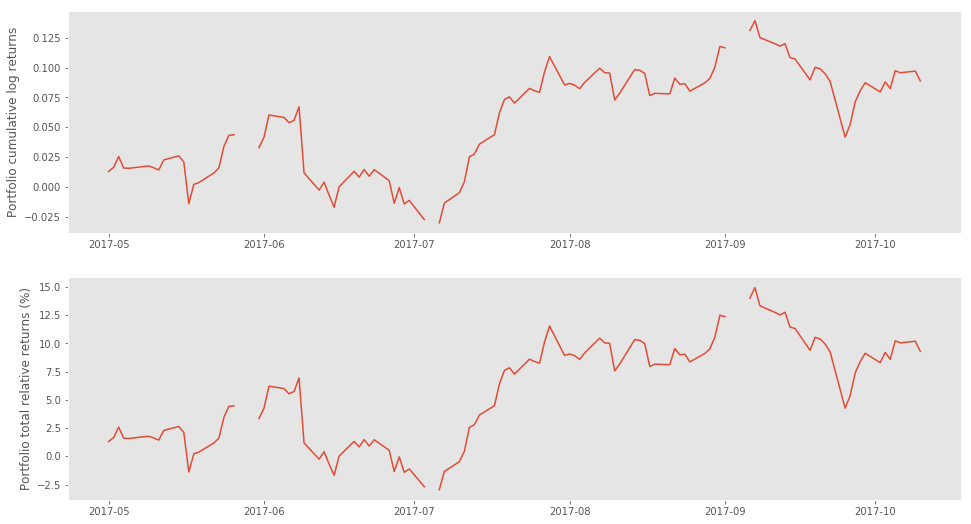

In [19]:
total_relative_returns = (np.exp(portfolio_log_returns.cumsum()) - 1)

fig = plt.figure(figsize=[16,9])
ax = fig.add_subplot(2, 1, 1)
ax.plot(portfolio_log_returns.index, portfolio_log_returns.cumsum())
ax.set_ylabel('Portfolio cumulative log returns')
ax.grid()
ax = fig.add_subplot(2, 1, 2)
ax.plot(total_relative_returns.index, 100 * total_relative_returns)
ax.set_ylabel('Portfolio total relative returns (%)')
ax.grid()
plt.show()

In [20]:
# Calculating the time-related parameters of the simulation
days_per_year = 52 * 5
total_days_in_simulation = data.shape[0]
number_of_years = total_days_in_simulation / days_per_year

# The last data point will give us the total portfolio return
total_portfolio_return = total_relative_returns[-1]
# Average portfolio return assuming compunding of returns
average_yearly_return = (1 + total_portfolio_return)**(1 / number_of_years) - 1

print('Total portfolio return is: ' +
      '{:5.2f}'.format(100 * total_portfolio_return) + '%')
print('Average yearly return is: ' +
      '{:5.2f}'.format(100 * average_yearly_return) + '%')

Total portfolio return is:  9.29%
Average yearly return is:  0.50%


In [21]:
total_relative_returns

2000-01-03         NaN
2000-01-04         NaN
2000-01-05         NaN
2000-01-06         NaN
2000-01-07         NaN
2000-01-10         NaN
2000-01-11         NaN
2000-01-12         NaN
2000-01-13         NaN
2000-01-14         NaN
2000-01-17         NaN
2000-01-18         NaN
2000-01-19         NaN
2000-01-20         NaN
2000-01-21         NaN
2000-01-24         NaN
2000-01-25         NaN
2000-01-26         NaN
2000-01-27         NaN
2000-01-28         NaN
2000-01-31         NaN
2000-02-01         NaN
2000-02-02         NaN
2000-02-03         NaN
2000-02-04         NaN
2000-02-07         NaN
2000-02-08         NaN
2000-02-09         NaN
2000-02-10         NaN
2000-02-11         NaN
                ...   
2017-08-30    0.105571
2017-08-31    0.124896
2017-09-01    0.123587
2017-09-04         NaN
2017-09-05         NaN
2017-09-06    0.140090
2017-09-07    0.149434
2017-09-08    0.133225
2017-09-11    0.127410
2017-09-12    0.125172
2017-09-13    0.127563
2017-09-14    0.114422
2017-09-15 

In [22]:
print(number_of_years)

17.834615384615386
